In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, GlobalAveragePooling2D, Conv2D, MaxPool2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2


In [3]:
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150
CHANNELS = 3

In [5]:
import os
train_path = '/content/drive/Shareddrives/Bấu bã mùa dịch/Hùng/ComputerVision/Sign_Languge_Recognition/train/'
test_path = '/content/drive/Shareddrives/Bấu bã mùa dịch/Hùng/ComputerVision/Sign_Languge_Recognition/test/'

In [6]:
from tensorflow.keras.applications.vgg16 import preprocess_input
train_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(train_path,
                                                                                                target_size = (IMAGE_WIDTH, IMAGE_HEIGHT),
                                                                                                batch_size = 64,
                                                                                                class_mode = 'categorical')
test_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(test_path,
                                                                                                target_size = (IMAGE_WIDTH, IMAGE_HEIGHT),
                                                                                                batch_size = 64,
                                                                                                class_mode = 'categorical')


Found 1505 images belonging to 5 classes.
Found 1505 images belonging to 5 classes.


In [14]:
def plotImage(image_arr):
    fig, ax = plt.subplots(1,10, figsize = (20,20))
    ax = ax.flatten()
    for img, ax in zip(image_arr, ax):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    


In [15]:
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 150, 150, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


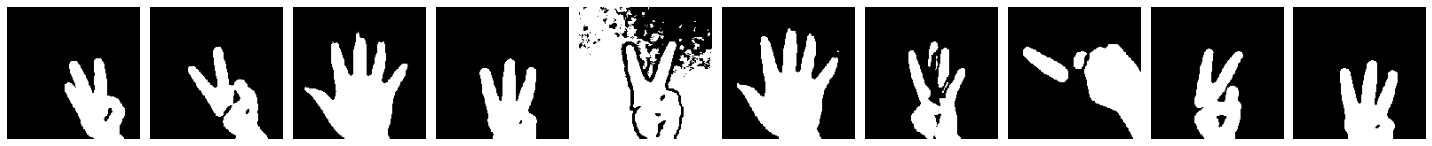

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0.

In [16]:
print(imgs.shape)
plotImage(imgs)
print(labels)

In [18]:
train_batches.classes


array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [40]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, CHANNELS)))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Conv2D(128, (3,3), activation='relu', padding='valid'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 74, 74, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 35, 35, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 36992)            

In [42]:
folders = glob('/content/drive/Shareddrives/Bấu bã mùa dịch/Hùng/ComputerVision/Sign_Languge_Recognition/train/*')

In [43]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=0.001))

In [44]:
history = model.fit(train_batches, 
                    validation_data = test_batches,
                    epochs = 10
                    )

Epoch 1/10
24/24 [==============================] - 709s 30s/step - loss: 11.9054 - accuracy: 0.5163 - val_loss: 1.5835 - val_accuracy: 0.3189
Epoch 2/10
24/24 [==============================] - 8s 354ms/step - loss: 0.3717 - accuracy: 0.8645 - val_loss: 2.2994 - val_accuracy: 0.4053
Epoch 3/10
24/24 [==============================] - 9s 361ms/step - loss: 0.0965 - accuracy: 0.9648 - val_loss: 3.1855 - val_accuracy: 0.3967
Epoch 4/10
24/24 [==============================] - 8s 353ms/step - loss: 0.0473 - accuracy: 0.9847 - val_loss: 3.5840 - val_accuracy: 0.3701
Epoch 5/10
24/24 [==============================] - 9s 371ms/step - loss: 0.0132 - accuracy: 0.9973 - val_loss: 5.0664 - val_accuracy: 0.3581
Epoch 6/10
24/24 [==============================] - 9s 369ms/step - loss: 0.0184 - accuracy: 0.9934 - val_loss: 4.9727 - val_accuracy: 0.3827
Epoch 7/10
24/24 [==============================] - 9s 368ms/step - loss: 0.0106 - accuracy: 0.9960 - val_loss: 4.6875 - val_accuracy: 0.4047
Epoch

In [45]:
model.save('/content/drive/Shareddrives/Bấu bã mùa dịch/Hùng/ComputerVision/Sign_Languge_Recognition/model_good.h5')

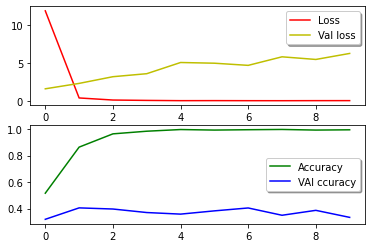

In [47]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color = 'r', label = 'Loss')
ax[0].plot(history.history['val_loss'], color  = 'y', label = 'Val loss')
legend = ax[0].legend(loc = 'best', shadow = True)
ax[1].plot(history.history['accuracy'], color='green', label='Accuracy')
ax[1].plot(history.history['val_accuracy'], color='blue', label = 'VAl ccuracy')
legend = ax[1].legend(loc = 'best', shadow = True)


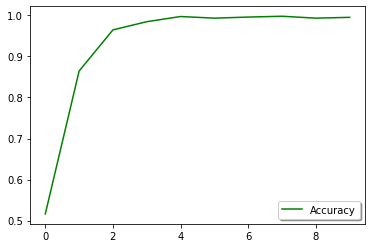

In [50]:
# plt.plot(history.history['loss'], color = 'red', label='Loss')
plt.plot(history.history['accuracy'], color = 'green', label = 'Accuracy')
plt.legend(loc = 'best', shadow = True)
plt.show()

In [ ]:
pred = model.predict()